In [4]:
#Importing libraries
%pip install pandas
import pandas as pd
import pandas as np
import seaborn as sns
import matplotlib.pyplot as px


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyforest

Data Collection

- import the data to jupyter notebook
- pandas for data manipulation


In [6]:
#Read the csv file
df = pd.read_csv("./Copy of Sample_DATA.csv")


In [7]:
#top 5 row of data
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [8]:
#check for datatypes
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [9]:
#data types overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [10]:
#Descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


Data Preparation

- Duplicate values
- Missing values
- Unique values
- Removing / Dropping the unique values


In [11]:
# check for duplicate values
df.duplicated().sum()
# there is no dupliacate value in dataset
# df.drop_duplicates()

np.int64(0)

In [12]:
#Missing values
df.isnull().sum

<bound method DataFrame.sum of      Transaction_ID   Date   Time  ...  Days_Since_Last_Transaction  amount  fraud
0             False  False  False  ...                        False   False  False
1             False  False  False  ...                        False   False  False
2             False  False  False  ...                        False   False  False
3             False  False  False  ...                        False   False  False
4             False  False  False  ...                        False   False  False
..              ...    ...    ...  ...                          ...     ...    ...
642           False  False  False  ...                        False   False  False
643           False  False  False  ...                        False   False  False
644           False  False  False  ...                        False   False  False
645           False  False  False  ...                        False   False  False
646           False  False  False  ...                  

How to deal with missing values

- Drop the missing values (Only if the missing values is very less in proportion)
- Amputation(Fill back the missing values)
- Forward fill
- Backward fill
- Linear Regression
- Mean value to replace the missing value(not recommended , as mean is sensitive to outliers)
- Median value shoul be used to replace as it is robust and is not sensitive to outliers , data distribution does not matter


In [13]:
#check the shape of the dataset
df.shape

(647, 20)

In [14]:
#unique value in dataset
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [15]:
#Drop the unique data values from the data
df.drop(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID', 'IP_Address'], axis=1, inplace=True)

In [16]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


Data Cleaning And Feature Engineering


In [17]:
# importing date and time module in python
import datetime as dt

In [18]:
# we are separating the data using year


In [19]:
# Converting column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

Creating a new Column 'Year' column with help of Datetime Module available in python. apply it to 'Date' column


In [20]:
#Extracting the year from the datetime module from the date column
df['Year'] = df['Date'].dt.year

In [22]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023


Creating a month column with the month of transactions


In [24]:
#Extracting the month from date column using datetime module
df['Month'] = df['Date'].dt.month

In [25]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [26]:
#Sort the series or array or list
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Months columns to have format 'MMM' as comapred to numbers 1-12


In [27]:
#Creating a dictionary with key value pairs for the number of months and their respective names

month = {
  1:'Jan',
  2:'Feb',
  3:'March',
  4:'April',
  5:'May',
  6:'June',
  7:'July',
  8:'August',
  9:'September',
  10:'October',
  11:'November',
  12:'December'
}

In [29]:
#Map the dictionary to the month column
df['Month'] = df['Month'].map(month)

In [30]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June


In [31]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [33]:
#Drop the date column
df.drop(['Date'],axis=1,inplace=True)

In [34]:
# now the date column is removed from the original datset
df.head()

,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June


In [35]:
# Remove the time too
df.drop(['Time'],axis=1,inplace=True)

In [36]:
df.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June


In [40]:
df['fraud'].value_counts(normalize=True)*100
#1 -- fraud

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

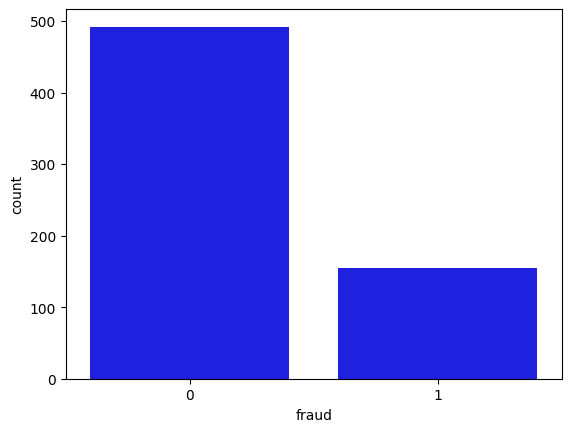

In [43]:
# Visual using seaborn library for data visulisation
sns.countplot(data=df,x='fraud',color='blue')